In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC

%matplotlib inline 

In [2]:
df = pd.read_csv('/Users/aneruthmohanasundaram/Documents/GitHub/Machine_Learning/Machine Learning/SVM/Project/iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

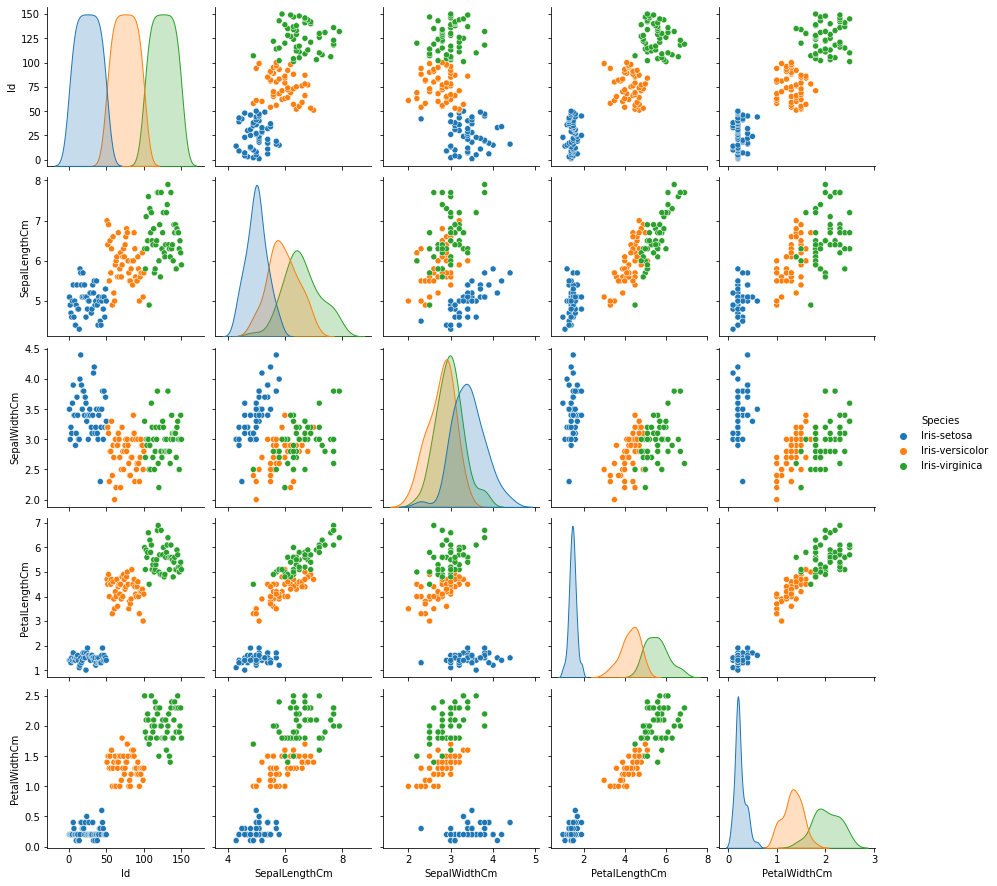

In [5]:
# Create a pairplot of the data set. Which flower species seems to be the most separable?
sns.pairplot(df,hue='Species')

In [14]:
# spliting the data into two datasets (Train Test Split)
X = df.drop('Species',axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [15]:
# Initialise the model 
lm = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Fitting the model 
lm.fit(X_train,y_train)

# Predicting the model 
pre = lm.predict(X_test)

# Print the svc model 
print(lm)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [16]:
# To print the classification report and confusion matrix 

# Classification report 
print('The classification report is:' + '\n \n',classification_report(y_test,pre))

print('\n')

# Confusion matrix 
print('The confusion matrix is:' + '\n \n',confusion_matrix(y_test,pre))

The classification report is:
 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.88      0.94        26
 Iris-virginica       0.83      1.00      0.91        15

       accuracy                           0.95        60
      macro avg       0.94      0.96      0.95        60
   weighted avg       0.96      0.95      0.95        60



The confusion matrix is:
 
 [[19  0  0]
 [ 0 23  3]
 [ 0  0 15]]


In [17]:
# Create a dictionary called param_grid and fill out some parameters for C and gamma.
pg = {"C":[0.1,1,10,100,1000],"gamma":[1,.1,.01,.001,.0001]}

In [18]:
# Create a GridSearchCV object and fit it to the training data.

# Creating a new grid 
grid = GridSearchCV(SVC(),pg,verbose=3)

# Testing the model 
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.389, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.389, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.389, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.389, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.389, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.389, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [19]:
# Taking the grid model and create some predictions using the test set.

# to get the best parameter fit from the grid
print('The best parameter is:',grid.best_params_)
print('\n')
# to get the best estimator from the grid
print('The best estimator is:',grid.best_estimator_)
print('\n')
# to get the best score from the grid
print('The best score is:',grid.best_score_)
print('\n')
# to get the predictions from the grid
grid_predict = grid.predict(X_test)
print('The Predicted value is:',grid_predict)

The best parameter is: {'C': 1, 'gamma': 0.0001}


The best estimator is: SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


The best score is: 0.9888888888888889


The Predicted value is: ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-v

In [20]:
# To compare the classification report and confusion matrix btwn two predicted results 

# Classification report 1
print('######## Classification report 1 ########')
print('\n')
print('The classification report is:' + '\n \n',classification_report(y_test,pre))

print('\n')

# Confusion matrix 1
print('######## Confusion matrix 1 ########')
print('\n')
print('The confusion matrix is:' + '\n \n',confusion_matrix(y_test,pre))

print('\n')

# Classification report 2
print('######## Classification report 2 ########')
print('\n')
print('The classification report is:' + '\n \n',classification_report(y_test,grid_predict))

print('\n')

# Confusion matrix 2
print('######## Confusion matrix 2 ########')
print('\n')
print('The confusion matrix is:' + '\n \n',confusion_matrix(y_test,grid_predict))

######## Classification report 1 ########


The classification report is:
 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.88      0.94        26
 Iris-virginica       0.83      1.00      0.91        15

       accuracy                           0.95        60
      macro avg       0.94      0.96      0.95        60
   weighted avg       0.96      0.95      0.95        60



######## Confusion matrix 1 ########


The confusion matrix is:
 
 [[19  0  0]
 [ 0 23  3]
 [ 0  0 15]]


######## Classification report 2 ########


The classification report is:
 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        26
 Iris-virginica       0.88      1.00      0.94        15

       accuracy                           0.97        60
      macro avg       0.96      0.97      0.97   

In [ ]:
########################################################### ###### End ###### ############################################################